In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
sns.set_theme(style="whitegrid")
cmap = plt.get_cmap('tab10').colors
colors = [cmap[3], cmap[1], cmap[0], cmap[2], cmap[3], cmap[1], cmap[0], cmap[2]]

In [2]:
def autolabel(rects, low=False, offset=0, color='k', fontsize=13):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        value = rect.get_height() 
        height = 0 if low else value
        ax.annotate('{}'.format(round(value,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, offset),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', c=color, font = {'family': 'normal', 'size': fontsize})

In [3]:
# C10
accuracies1 = [92.23, 92.91, 93.08, 91.31]
noisy1 = [73.18, 80.46, 82.10, 84.49]

noisy_1 = accuracies1[0] - np.array([77.43, 73.26, 59.79, 82.48, 77.2])
noisy_2 = accuracies1[1] - np.array([89.73, 79.56, 73.23, 85.96, 83.08])
noisy_3 = accuracies1[2] - np.array([90.32, 82.52, 73.9, 87.9, 84])
noisy_4 = accuracies1[3] - np.array([88.99, 81.54, 80.81, 87.33, 88.26])
regrets1 = [noisy_1, noisy_2, noisy_3, noisy_4]
errs1 = [np.std(x) for x in regrets1]

In [4]:
# C100
accuracies2 = [69.53, 69.78, 70.33, 68.34, 69.48]
noisy2 = [51.25, 54.32, 57.14, 59.36]

noisy_1 = accuracies2[0] - np.array([60.76, 48.28, 42.6, 57.9, 56.2])
noisy_2 = accuracies2[1] - np.array([63.02, 53.14, 47.75, 59.92, 57.32])
noisy_3 = accuracies2[2] - np.array([64.31, 55.1, 50.8, 62.99, 59.65])
noisy_4 = accuracies2[3] - np.array([65.75, 57.42, 53.2, 65.23, 61.58])
regrets2 = [noisy_1, noisy_2, noisy_3, noisy_4]
errs2 = [np.std(x) for x in regrets2]

In [5]:
labels = ['Baseline', '+ ReLU6', '+ Training aware', '+ Order Inversion']
x = [1.2, 2.4, 3.6, 4.8, 7.2, 8.4, 9.6, 10.8]

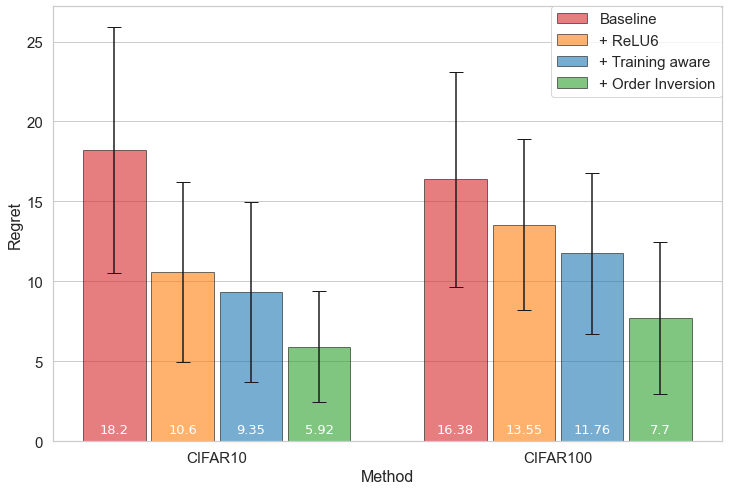

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))

for i in range(0,4):
    bar = plt.bar(height=round(np.mean(regrets1[i]),2), x=x[i], width=1.1, color=colors[i],
                 tick_label=[''], alpha=0.6, edgecolor='k', yerr=errs1[i], capsize=7, label=labels[i])
    autolabel(bar, True, offset=5, color='w', fontsize=13)
    
for i in range(0,4):
    bar = plt.bar(height=round(np.mean(regrets2[i]),2), x=x[i+4], width=1.1, color=colors[i],
                 tick_label=[''], alpha=0.6, edgecolor='k', yerr=errs2[i], capsize=7)
    autolabel(bar, True, offset=5, color='w', fontsize=13)
    
plt.ylabel('Regret', fontsize=16)
plt.xlabel('Method', fontsize=16)
plt.xticks([3, 9], ['CIFAR10', 'CIFAR100'], fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0.745, 1), loc=2, borderaxespad=0., prop={'size': 15})
plt.grid(axis='x')
plt.savefig("bars_regrets.pdf")
plt.show()

In [3]:
SDC = [241 / 644 * 100, 24 / 644 * 100]
accuracy = [92.23, 91.31]
time = [0.01607 * 1e4 / 200, 0.01572  * 1e4 / 200]
metrics = SDC + accuracy + time
x = [1, 2, 3.5, 4.5, 6, 7]

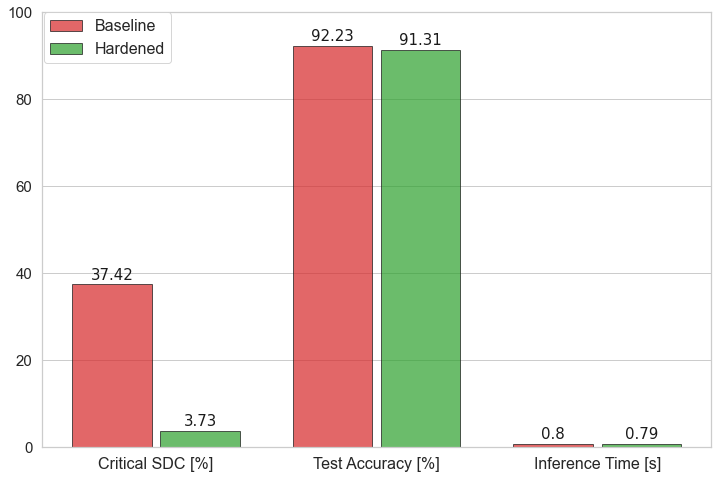

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
bar = ax.bar(height=metrics[::2], x=x[::2], width=0.9, tick_label=[''], alpha=0.7, color=cmap[3], edgecolor='k', label='Baseline')
autolabel(bar, False, offset=2, color='k', fontsize=15)
bar = ax.bar(height=metrics[1::2], x=x[1::2], width=0.9, tick_label=[''], alpha=0.7, color=cmap[2], edgecolor='k', label='Hardened')
autolabel(bar, False, offset=2, color='k', fontsize=15)
plt.xticks([1.5, 4, 6.5], ['Critical SDC [%]', 'Test Accuracy [%]', 'Inference Time [s]'], fontsize=16)
plt.yticks(fontsize=15)
fig.legend(bbox_to_anchor=(.275, 0.88), borderaxespad=0., prop={'size': 16})
plt.grid(axis='x')
plt.ylim(0,100)
plt.savefig("init.pdf")
plt.show()

In [48]:
x1 = np.linspace(-9,-7, int(1e3))
x2 = np.linspace(-7,6, int(1e6))
x3 = np.linspace(6,9, int(1e3))

y1 = np.clip(x1, 0, None)
y2 = np.clip(x2, 0, 6)
y3 = np.clip(x3, 0, 6)

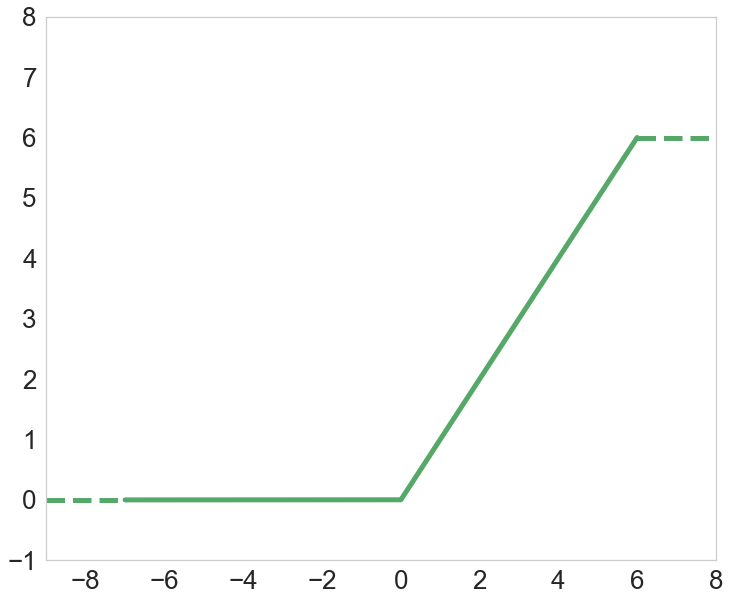

In [49]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(x1, y1, c='g', linewidth=5, linestyle='dashed')
plt.plot(x2, y2, c='g', linewidth=5)
plt.plot(x3, y3, c='g', linewidth=5, linestyle='dashed')
plt.xlim(-9,8)
plt.ylim(-1,8)
plt.yticks(np.arange(-1,9), fontsize=26)
plt.xticks(np.arange(-8,10, 2), fontsize=26)
plt.grid(False)
plt.savefig("relu6.png")